In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning - LAT UAS/Penguins/penguins.csv')
dataset.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
dataset.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [ ]:
dataset.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [ ]:
dataset['culmen_length_mm'] = dataset['culmen_length_mm'].fillna(dataset['culmen_length_mm'].median())
dataset['culmen_depth_mm'] = dataset['culmen_depth_mm'].fillna(dataset['culmen_depth_mm'].median())
dataset['flipper_length_mm'] = dataset['flipper_length_mm'].fillna(dataset['flipper_length_mm'].median())
dataset['body_mass_g'] = dataset['body_mass_g'].fillna(dataset['body_mass_g'].median())
dataset['sex'] = dataset['sex'].fillna(dataset['sex'].mode()[0])

In [ ]:
dataset.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
dataset['sex'].value_counts()

sex
MALE      178
FEMALE    165
.           1
Name: count, dtype: int64

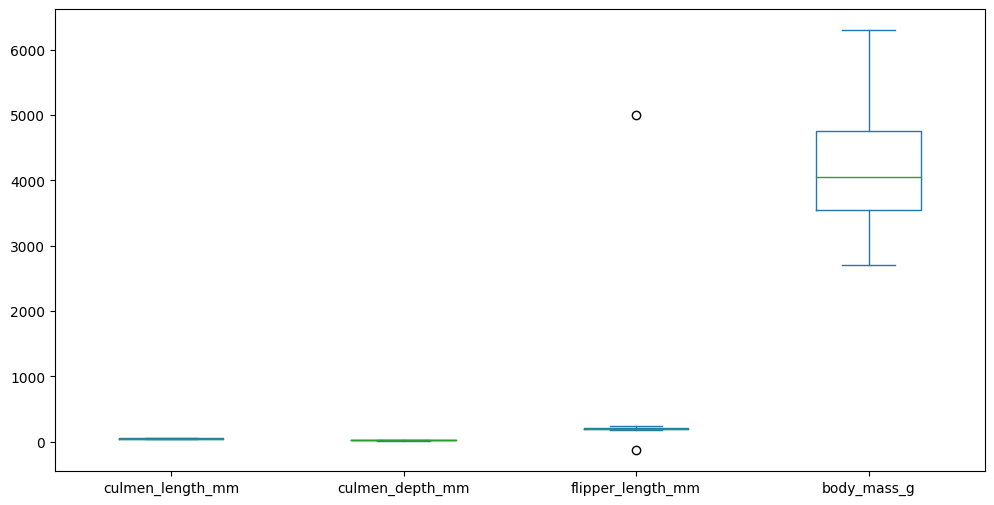

In [ ]:
ax = dataset.plot(kind='box', figsize=(12, 6))
plt.show()

In [ ]:
print(dataset[dataset['flipper_length_mm'] >= 5000])
print(dataset[dataset['flipper_length_mm'] < 0])
print(dataset[dataset['sex'] == '.'])

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
9              42.0             20.2             5000.0       4250.0  MALE
    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
14              34.6             21.1             -132.0       4400.0  MALE
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g sex
336              44.5             15.7              217.0       4875.0   .


In [ ]:
dataset = dataset.drop([9, 14, 336])

In [ ]:
dataset['sex'].value_counts()

sex
MALE      176
FEMALE    165
Name: count, dtype: int64

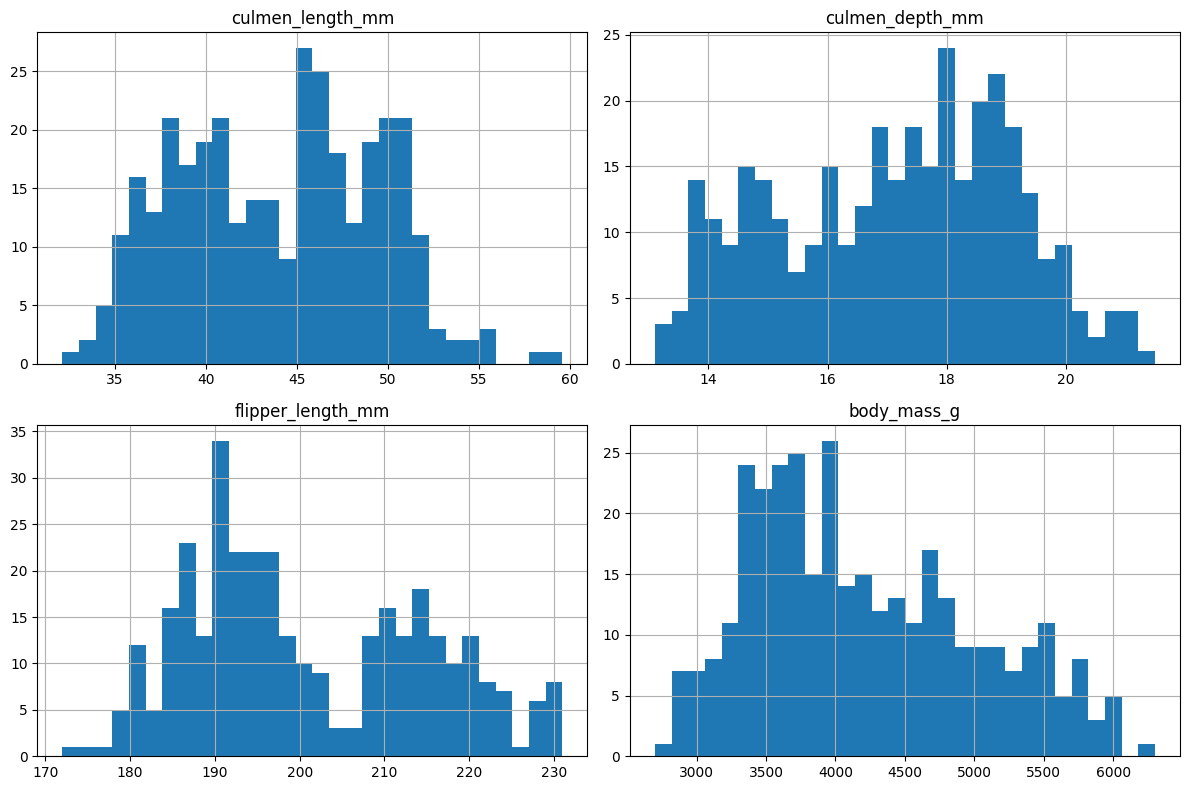

In [ ]:
dataset.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

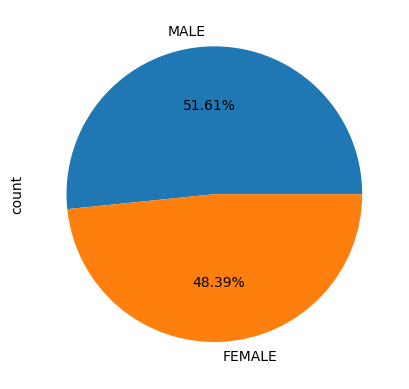

In [ ]:
ax = dataset['sex'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = pd.get_dummies(dataset, columns=['sex'])
# dataset_categorical = encoder.fit_transform(dataset[['sex']])
dataset = dataset.drop(columns=['sex'])
dataset = pd.concat([dataset, dataset_categorical], axis=1)

In [ ]:
dataset.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.10,18.7,181.0,3750.0,0.0,1.0
1,39.50,17.4,186.0,3800.0,1.0,0.0
2,40.30,18.0,195.0,3250.0,1.0,0.0
3,44.45,17.3,197.0,4050.0,0.0,1.0
4,36.70,19.3,193.0,3450.0,1.0,0.0


In [ ]:
sc = StandardScaler()
dataset[dataset.columns] = sc.fit_transform(dataset[dataset.columns])
dataset.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.893500,0.800270,-1.417916,-0.559422,-0.968246,0.968246
1,-0.819905,0.135179,-1.061399,-0.497010,1.032796,-1.032796
2,-0.672715,0.442144,-0.419666,-1.183544,1.032796,-1.032796
3,0.090834,0.084018,-0.277059,-0.184949,-0.968246,0.968246
4,-1.335070,1.107235,-0.562274,-0.933895,1.032796,-1.032796


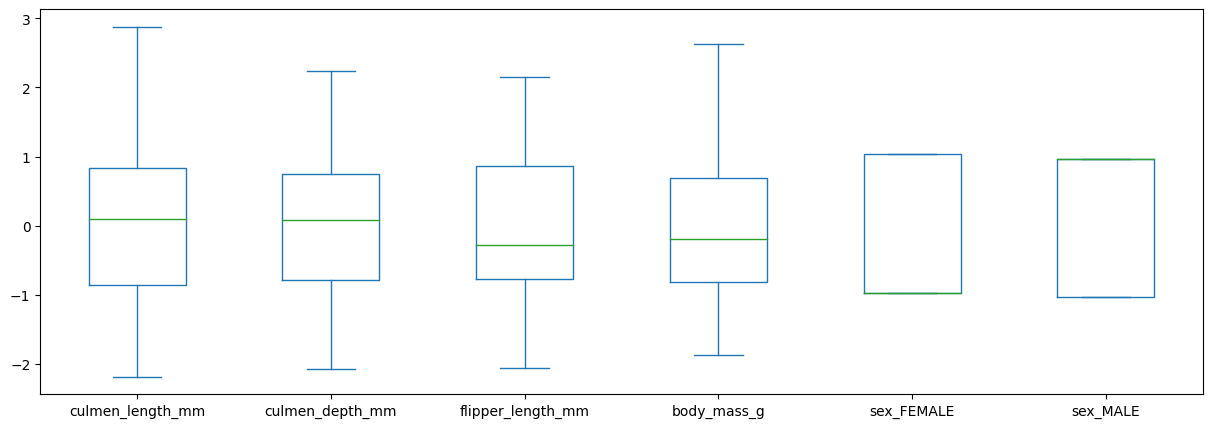

In [ ]:
ax = dataset.plot(kind='box', figsize=(15, 5))
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pd.DataFrame(pca.fit_transform(dataset), columns=['PC1', 'PC2'])
principal_components.head()

,PC1,PC2
0,-0.780049,-2.065777
1,-1.925506,0.486731
2,-1.954286,0.387238
3,0.520708,-1.139794
4,-2.300575,-0.070305


Text(0.5, 1.0, 'Data Scatter after PCA')

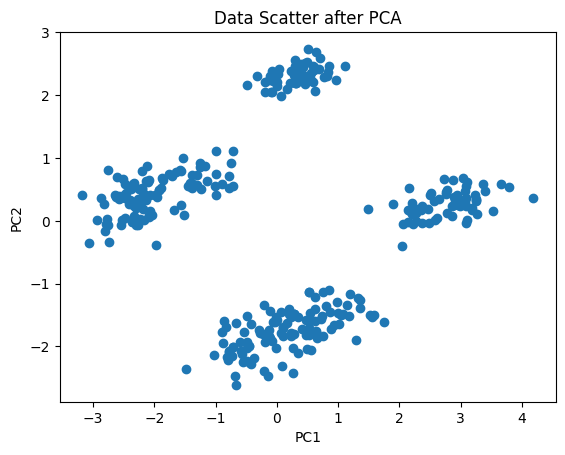

In [ ]:
plt.scatter(principal_components['PC1'], principal_components['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data Scatter after PCA')

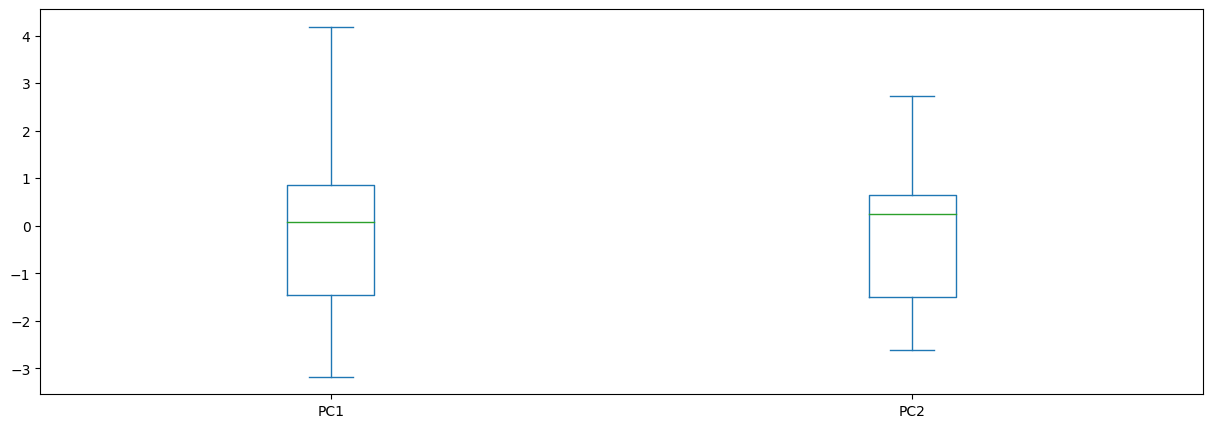

In [ ]:
ax = principal_components.plot(kind='box', figsize=(15, 5))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

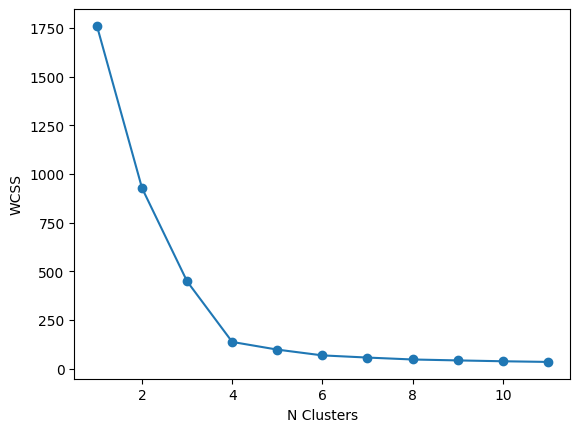

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 12):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(principal_components)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 12), wcss, marker='o')
plt.xlabel('N Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++')
clusters = kmeans.fit_predict(principal_components)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


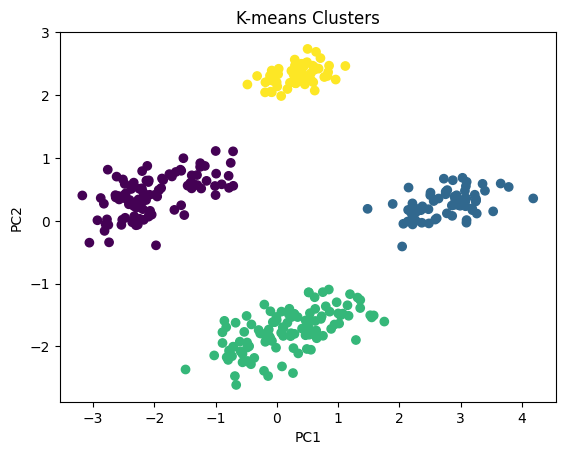

In [ ]:
plt.scatter(principal_components['PC1'], principal_components['PC2'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("K-means Clusters")
plt.show()

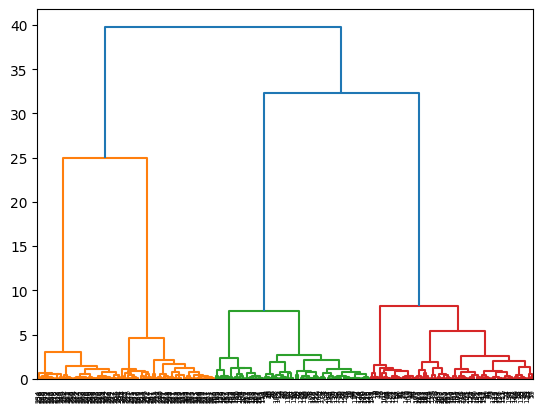

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(principal_components, method='ward'))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
cluster1 = hc.fit(principal_components)

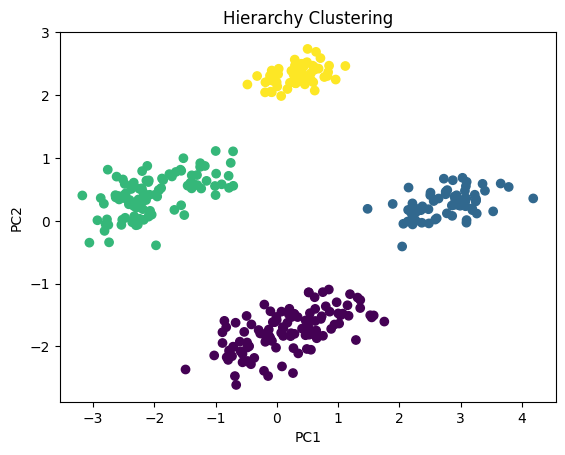

In [ ]:
plt.scatter(principal_components['PC1'], principal_components['PC2'], c=hc.labels_, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Hierarchy Clustering")
plt.show()

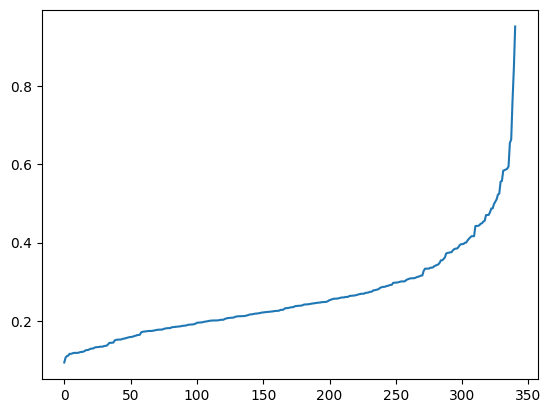

<Figure size 1000x600 with 0 Axes>

In [ ]:
from sklearn.neighbors import NearestNeighbors
k = 10
neighbors = NearestNeighbors(n_neighbors=k)
n_fit = neighbors.fit(principal_components)
distance, indices = n_fit.kneighbors(principal_components)

distance = np.sort(distance[:, k-1], axis=0)
plt.plot(distance)
plt.figure(figsize=(10, 6))
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.6, min_samples=10)
clusters3 = db.fit(principal_components)

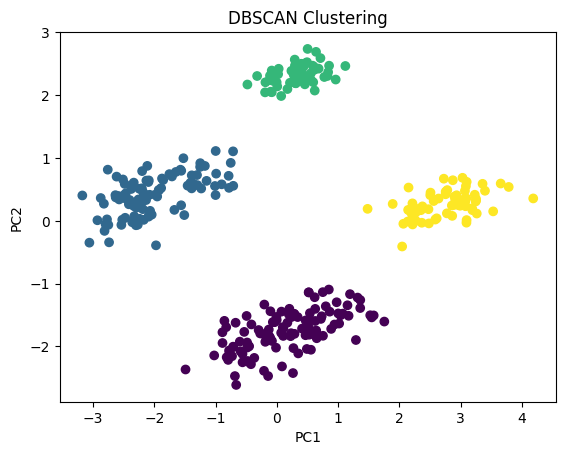

In [ ]:
plt.scatter(principal_components['PC1'], principal_components['PC2'], c = db.labels_, cmap ='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN Clustering")
plt.show()